In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pylab import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge, RidgeCV



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/MyDrive/NFL_Passing_Stats.xlsx')

In [24]:
df.head()

,Rk,Tm,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,...,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,EXP
0,1,Tampa Bay Buccaneers,17,492,731,67.3,5229,43,5.9,12,...,307.6,101.6,23,154,3.1,6.9,7.4,3,5,197.87
1,2,Los Angeles Chargers,17,443,674,65.7,4800,38,5.6,15,...,282.4,97.4,31,214,4.4,6.8,6.9,5,5,168.57
2,3,Dallas Cowboys,17,444,647,68.6,4800,40,6.2,11,...,282.4,104.8,33,163,4.9,7.1,7.5,2,3,161.67
3,4,Kansas City Chiefs,17,448,675,66.4,4791,37,5.5,13,...,281.8,98.1,28,146,4.0,6.8,7.0,3,3,236.96
4,5,Los Angeles Rams,17,406,607,66.9,4642,41,6.8,18,...,273.1,101.6,31,251,4.9,7.3,7.3,3,4,237.30


In [25]:
df.shape


(32, 25)

In [ ]:
df.drop('Tm', axis=1, inplace=True)
df.drop('G', axis=1, inplace=True)
df.drop('Rk', axis=1, inplace=True)
#Dropping columns that are redundant or non-numerical such as team names and games played, as each team played 17 games. I also dropped the rank column, as this is redundant.

In [29]:
df.head()

,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,...,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,EXP
0,492,731,67.3,5229,43,5.9,12,1.6,62,7.4,...,307.6,101.6,23,154,3.1,6.9,7.4,3,5,197.87
1,443,674,65.7,4800,38,5.6,15,2.2,72,7.4,...,282.4,97.4,31,214,4.4,6.8,6.9,5,5,168.57
2,444,647,68.6,4800,40,6.2,11,1.7,73,7.7,...,282.4,104.8,33,163,4.9,7.1,7.5,2,3,161.67
3,448,675,66.4,4791,37,5.5,13,1.9,75,7.3,...,281.8,98.1,28,146,4.0,6.8,7.0,3,3,236.96
4,406,607,66.9,4642,41,6.8,18,3.0,79,8.1,...,273.1,101.6,31,251,4.9,7.3,7.3,3,4,237.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      32 non-null     int64  
 1   Tm      32 non-null     object 
 2   G       32 non-null     int64  
 3   Cmp     32 non-null     int64  
 4   Att     32 non-null     int64  
 5   Cmp%    32 non-null     float64
 6   Yds     32 non-null     int64  
 7   TD      32 non-null     int64  
 8   TD%     32 non-null     float64
 9   Int     32 non-null     int64  
 10  Int%    32 non-null     float64
 11  Lng     32 non-null     int64  
 12  Y/A     32 non-null     float64
 13  AY/A    32 non-null     float64
 14  Y/C     32 non-null     float64
 15  Y/G     32 non-null     float64
 16  Rate    32 non-null     float64
 17  Sk      32 non-null     int64  
 18  Yds.1   32 non-null     int64  
 19  Sk%     32 non-null     float64
 20  NY/A    32 non-null     float64
 21  ANY/A   32 non-null     float64
 22  4QC 

Now it's your time to analyze (i.e., create model + evaluate) this data with a decision tree regressor.

Please also visualize the tree. You can also try to specify different arguments here to create different trees. For example, `max_depth=3` or `max_depth=4`.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

**Please include some comments to make your code easier to read.**


In [43]:
X = df.drop('EXP', axis = 1)
y = df['EXP']
#Setting my X variable to everything besides expected points, as expected points is my dependent variable. As a result this is my Y variable

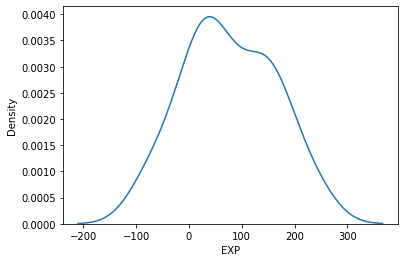

In [123]:
sns.kdeplot(x=df['EXP'])
show()

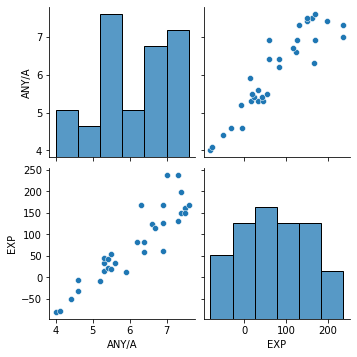

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df[['ANY/A', 'EXP']])
#Creating a pairplot to see the relationship between the dependent variable and another common predictor of success, average net yards per attempt

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 2032019)
#split test and train data

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#convert test and train data to numpy array

In [78]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#bring x values all to same scale

In [79]:
RR = Ridge(alpha=1)
RR = RR.fit(X_train, y_train)
#Using Ridge method initially


In [96]:
train_preds_RR = RR.predict(X_train)
test_preds_RR = RR.predict(X_test)

In [97]:
#Now we select our best alpha
alphas = [0.01, 0.05, 0.1, 0.5, 1]

for a in alphas:
  model = Ridge(alpha=a).fit(X_train, y_train) 
  score = model.score(X_train, y_train)
  pred_y = model.predict(X_train)
  mse = mean_squared_error(y_train, pred_y) 
  print("Alpha:{0:.3f}, R2:{1:.5f}, MSE:{2:.5f}, RMSE:{3:.5f}".format(a, score, mse, np.sqrt(mse)))

# I want to see a bigger R2, smaller MSE, smaller RMSE

Alpha:0.010, R2:0.96622, MSE:221.12610, RMSE:14.87031
Alpha:0.050, R2:0.96103, MSE:255.13620, RMSE:15.97298
Alpha:0.100, R2:0.95859, MSE:271.07917, RMSE:16.46448
Alpha:0.500, R2:0.95173, MSE:315.99505, RMSE:17.77625
Alpha:1.000, R2:0.94956, MSE:330.16206, RMSE:18.17036


In [98]:
RR_best = RR = Ridge(alpha=0.01)
RR_best = RR_best.fit(X_train, y_train)

# store the predictions
train_preds = RR_best.predict(X_train) 
test_preds = RR_best.predict(X_test) 

In [99]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - look at the documentation: actual, predicted
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

# bigger numbers are better, values will be between 0 and 1

This is train R2: 0.966220519641849
This is test R2: 0.6404735068256564


In [100]:
# 2) mae- look at the documentation: actual, predicted
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("This is testMAE:", testMAE) # test

# values between 0 and +Inf
# values closer to 0 are better

This is trainMAE: 11.473259987095293
This is testMAE: 49.58885870156724


In [104]:
# 3) mse- look at the documentation: actual, predicted
trainMSE = mean_squared_error(y_train, train_preds)
print("This is trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)
print("This is testMSE:", testMSE)

# values between 0 and +Inf
# values closer to 0 are better

This is trainMSE: 221.12609843280526
This is testMSE: 2811.85885440568


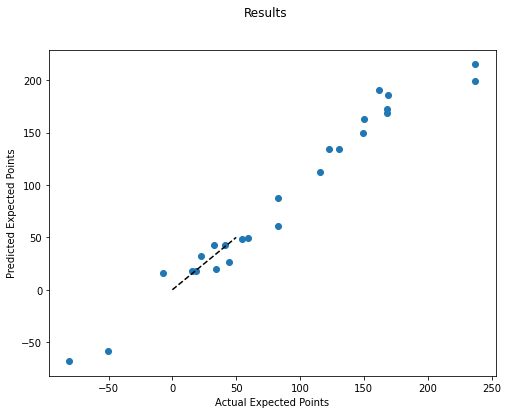

In [103]:
# scatterplot for train results

figure(figsize=(8, 6))
scatter(x=y_train, y=train_preds)
plot([0, 50], [0, 50], '--k') # 45 degree line
axis('tight')
xlabel('Actual Expected Points')
ylabel('Predicted Expected Points')
suptitle('Results')
show()

In [ ]:
#Now we use Decision Tree Regression

In [76]:
from sklearn.linear_model import LogisticRegression # logistic
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [94]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(25, 21) (7, 21) (25,) (7,)


In [105]:
DTR = DecisionTreeRegressor() 
DTR = DTR.fit(X_train_r, y_train_r)


In [106]:
train_preds_DTR = DTR.predict(X_train_r) 
test_preds_DTR = DTR.predict(X_test_r) 

In [107]:
# here, we are searching different combinations of parameter
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5], # you can play with the number here
           "min_samples_leaf":[1,2,3,4], # you can play with the number here
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5], # you can play with the number here
           "max_features":["auto","log2"], # you can play with the number here
           "max_leaf_nodes":[5, 10] } # you can play with the number here

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
tuning_model = GridSearchCV(DTR, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=0)

In [110]:
tuning_model.fit(X_train_r,y_train_r)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [112]:
tuning_model.best_params_
#This output will tell us our best parameter combinations from our grid search

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'random'}

In [114]:
#We will now use the above output to define our best decision tree parameters
best_tree = DecisionTreeRegressor(max_depth=5,
                                  max_features='auto',
                                  max_leaf_nodes=10,
                                  min_samples_leaf=4,
                                  min_weight_fraction_leaf=0.2,
                                  splitter='random')

In [115]:
best_tree = best_tree.fit(X_train_r, y_train_r)

In [116]:
train_preds_DTR = best_tree.predict(X_train_r) 
test_preds_DTR = best_tree.predict(X_test_r) 

In [117]:
# 1) R2 value - for Decision Tree Regression
print("This is train R2 (DTR):", r2_score(y_train_r, train_preds_DTR)) # train
print("This is test R2 (DTR):", r2_score(y_test_r, test_preds_DTR)) # test
#R2 is closer to 1 than 0, which is good

This is train R2 (DTR): 0.8352946086265224
This is test R2 (DTR): 0.72706226289767


In [118]:
# 2) mae - for DT Regression
trainMAE_DTR = mean_absolute_error(y_train_r, train_preds_DTR)
print("This is trainMAE (DTR):", trainMAE_DTR) # train
testMAE_DTR = mean_absolute_error(y_test_r, test_preds_DTR)
print("This is testMAE (DTR):", testMAE_DTR) # test
#MAE is good when it is closer to 0 between 0 and infinity, so this is good

This is trainMAE (DTR): 26.269680000000005
This is testMAE (DTR): 37.657809523809526


In [119]:
# 3) mse
trainMSE_DTR = mean_squared_error(y_train_r, train_preds_DTR)
print("This is trainMSE (DTR):", trainMSE_DTR)
testMSE_DTR = mean_squared_error(y_test_r, test_preds_DTR)
print("This is testMSE (DTR):", testMSE_DTR)
#MSE is good when closer to 0 between 0 and infinity. It could be much larger, so the result is not ideal but not bad either. 

This is trainMSE (DTR): 1078.1888945333335
This is testMSE (DTR): 2134.6476750476195


In [129]:
#Now we do logistic regression

In [130]:
# Convert the dependent variable to binary
df['EXP'] = np.where(df['EXP'] > df['EXP'].median(),
                      1, # if true
                      0) # if false

In [145]:
# Making sure the binary conversion worked - looks like it did
df['EXP'].head(n=32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    0
Name: EXP, dtype: int64

In [133]:

Y = df['EXP']
print(Y.shape) 

(32,)


In [135]:
# everything else is X 

X = df.drop('EXP', axis=1)
print(X.shape) 

(32, 21)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2037016)

In [137]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [138]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# make a variable to store the general model
LR = LogisticRegression() # use logistic for a classification problem
# fit the model - one line of code
LR = LR.fit(X_train, y_train) # always going to be (X_train, y_train)

In [140]:
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test) 

In [141]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 11
TN: 13
FP: 0
FN: 1


In [144]:
#This model seems effective, with 0 false positive and only 1 false negative

In [142]:


# train results
trainResults = classification_report(y_train, train_preds) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [143]:
#This model has an accuracy of 96%